En la práctica de la clase de hoy usaremos un dataset de Kaggle que tiene datos de ventas:

https://www.kaggle.com/kyanyoga/sample-sales-data

Ustedes tienen un subconjunto de los datos disponibles, que usaremos para resolver ejercicios de Numpy, Estadística y Probabilidad.

## Ejercicio 1
Leer los datos del archivo /M1/CLASE_03/Data/sales_data_sample_excercise.csv

Este archivo tiene algunos datos numéricos y otros de tipo cadena de caracteres. 

Las columnas son:

* ORDERNUMBER: int, id de la orden

* SALES: float, monto abonado

* MONTH_ID: int, mes

* YEAR_ID: int, año

* PRODUCTLINE: str, producto

* COUNTRY: str, país de venta

¿Recuerdan que todos los elementos de una instancia de ndarray deben ser del mismo tipo? Entonces vamos a leer el archivo y crear una instancia de ndarray de tipo cadena de caracteres.

¿Qué pasaría si intentáramos crear una instancia de tipo int? ¿Y de tipo float?


In [7]:
import numpy as np
import pandas as pd

# local:
data_location = '../Data/sales_data_sample_excercise.csv'

# Uso pandas porque me parece más útil que un array de numpy para esto, en la calse 2 ya vimos como se hace con numpy y respondimos esas preguntas
df = pd.read_csv(data_location, delimiter='\t')
df

,ORDERNUMBER,SALES,MONTH_ID,YEAR_ID,PRODUCTLINE,COUNTRY
0,10107,2871.00,2,2003,Motorcycles,USA
1,10121,2765.90,5,2003,Motorcycles,France
2,10134,3884.34,7,2003,Motorcycles,France
3,10145,3746.70,8,2003,Motorcycles,USA
4,10159,5205.27,10,2003,Motorcycles,USA
...,...,...,...,...,...,...
2818,10350,2244.40,12,2004,Ships,Spain
2819,10373,3978.51,1,2005,Ships,Finland
2820,10386,5417.57,3,2005,Ships,Spain
2821,10397,2116.16,3,2005,Ships,France


## Ejercicio 2

Ahora queremos simular datos que representen las precios de ventas de USA en el mismo período, usando una distribución normal.

¿Qué parámetros tiene esa distribución?

Generar 100 datos simulados.

In [64]:
ventas_usa =df[df['COUNTRY'] == 'USA']['SALES']
media_usa = ventas_usa.mean()
mediana_usa = ventas_usa.median()
std_usa = ventas_usa.std()
moda_usa = ventas_usa.mode()
rango_usa = ventas_usa.max() - ventas_usa.min()

print(f"Media: {media_usa}")
print(f"Mediana: {mediana_usa}")
print(f"Desvío estándar: {std_usa}")
print(f"Rango: {rango_usa}")
print(f"Moda: {moda_usa}")

Media: 3613.5287151394423
Mediana: 3236.06
Desvío estándar: 1880.9341465282398
Rango: 13541.66
Moda: 0    2559.60
1    2624.00
2    2851.54
3    3451.00
4    3734.00
5    4181.44
dtype: float64


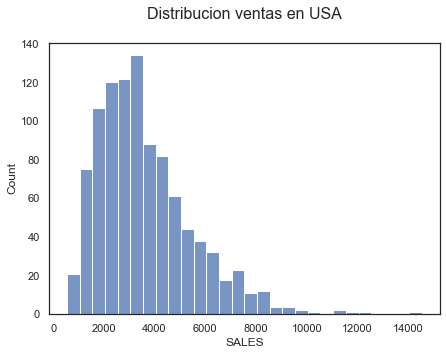

In [70]:
import matplotlib.pyplot as plt
import seaborn as sns

def distribution_plotter(data, label, bin_width=500):    
    sns.set(rc={"figure.figsize": (7, 5)})
    sns.set_style("white")    
    dist = sns.histplot(data, stat = 'count', kde = False, 
                        line_kws = {'linewidth':5}, 
                        binwidth = bin_width)    
    dist.set_title('Distribucion ' + label + '\n', fontsize = 16)
    
distribution_plotter(ventas_usa, 'ventas en USA')

La distribución en USA es asimétrica a la derecha, aunque la moda no parece seguir esa distribución (es mayor a la media y la mediana)

In [84]:
rng = np.random.default_rng(987)
rng_data = rng.normal(loc=media_usa, scale=std_usa, size=100)

## Ejercicio 3

Agregando a los datos originales los datos simulados en el punto anterior, calcular: 
* Media
* Mediana
* Rango
* Desvío estandard

Y comparar con el conjunto sin datos simulados

Ayuda: https://docs.scipy.org/doc/numpy/reference/generated/numpy.concatenate.html

In [85]:
ventas_usa_adapt = pd.concat([ventas_usa, pd.Series(rng_data)], ignore_index=True)
# Alternativa: np.concatenate((ventas_usa, rng_data))

In [86]:
media_usa_adapt = ventas_usa_adapt.mean()
mediana_usa_adapt = ventas_usa_adapt.median()
std_usa_adapt = ventas_usa_adapt.std()
rango_usa_adapt = ventas_usa_adapt.max() - ventas_usa_adapt.min()
moda_usa_adapt = ventas_usa_adapt.mode()

print(f"Media nueva: {media_usa_adapt}. Anterior: {media_usa}")
print(f"Mediana nueva: {mediana_usa_adapt}. Anterior: {mediana_usa}")
print(f"Desvío estándar nuevo: {std_usa_adapt}. Anterior: {std_usa}")
print(f"Rango nuevo: {rango_usa_adapt}. Anterior: {rango_usa}")
print(f"Moda nueva: {moda_usa_adapt}. Anterior: {moda_usa}")

Media nueva: 3594.3094482212705. Anterior: 3613.5287151394423
Mediana nueva: 3240.2650000000003. Anterior: 3236.06
Desvío estándar nuevo: 1893.024356334076. Anterior: 1880.9341465282398
Rango nuevo: 15775.61006624587. Anterior: 13541.66
Moda nueva: 0    2559.60
1    2624.00
2    2851.54
3    3451.00
4    3734.00
5    4181.44
dtype: float64. Anterior: 0    2559.60
1    2624.00
2    2851.54
3    3451.00
4    3734.00
5    4181.44
dtype: float64


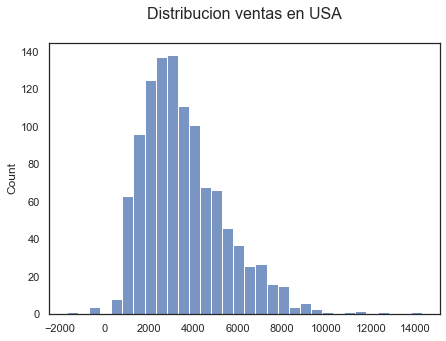

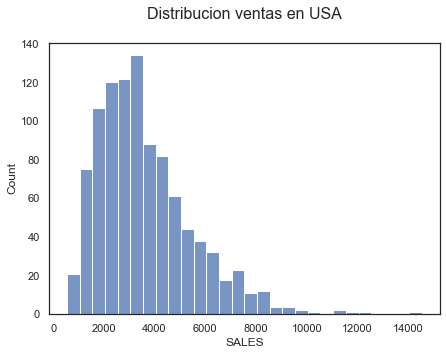

In [87]:
distribution_plotter(ventas_usa_adapt, 'ventas en USA')
plt.show()
distribution_plotter(ventas_usa, 'ventas en USA')

Se ve bastante similar la distribución visualmente y en los parámetros estadísticos, aunque aparecieron algunos datos outliers que se tendrían que sacar en limpieza posterior(principalmente los negativos). Si agrego más datos creados, cada vez tendrá más parecido con una normal y no una asímetrica derecha (right-skewed).

## Ejercicio 4

Ahora queremos simular datos que representen las precios de ventas de USA en el mismo período, usando una distribución uniforme.

¿Qué parámetros tiene esa distribución?

Generar 100 datos simulados.

In [77]:
min_usa = ventas_usa.min()
max_usa = ventas_usa.max()

In [78]:
rng_data_unif = rng.uniform(low=min_usa, high=max_usa, size=100)

## Ejercicio 5

Agregando a los datos originales los datos simulados en el punto anterior, calcular: 
* Media
* Mediana
* Rango
* Desvío estandard

Y comparar con el conjunto sin datos simulados.

In [93]:
ventas_usa_unif = pd.concat([ventas_usa, pd.Series(rng_data_unif)], ignore_index=True)

In [95]:
media_usa_unif = ventas_usa_unif.mean()
mediana_usa_unif = ventas_usa_unif.median()
std_usa_unif = ventas_usa_unif.std()
rango_usa_unif = ventas_usa_unif.max() - ventas_usa_unif.min()
moda_usa_unif = ventas_usa_unif.mode()

print(f"Media nueva: {media_usa_unif}. Anterior: {media_usa}")
print(f"Mediana nueva: {mediana_usa_unif}. Anterior: {mediana_usa}")
print(f"Desvío estándar nuevo: {std_usa_unif}. Anterior: {std_usa}")
print(f"Rango nuevo: {rango_usa_unif}. Anterior: {rango_usa}")
print(f"Moda nueva: {moda_usa_unif}. Anterior: {moda_usa}")

Media nueva: 3957.192022649062. Anterior: 3613.5287151394423
Mediana nueva: 3359.04. Anterior: 3236.06
Desvío estándar nuevo: 2400.899174742119. Anterior: 1880.9341465282398
Rango nuevo: 13541.66. Anterior: 13541.66
Moda nueva: 0    2559.60
1    2624.00
2    2851.54
3    3451.00
4    3734.00
5    4181.44
dtype: float64. Anterior: 0    2559.60
1    2624.00
2    2851.54
3    3451.00
4    3734.00
5    4181.44
dtype: float64


## Ejercicio 6

¿Cuál de las dos imputaciones de datos preservó mejor la distribución original?

In [104]:
import seaborn as sns

def distribution_plotter(data, label, color = 'steelblue',
                         bin_width=200):    
    sns.set(rc={"figure.figsize": (7, 5)})
    sns.set_style("white")    
    dist = sns.histplot(data, stat = 'count', kde = False, 
                        line_kws = {'linewidth':5}, 
                        binwidth = bin_width,
                       color = color)    
    dist.set_title('Distribucion ' + label + '\n', fontsize = 16)
    
    


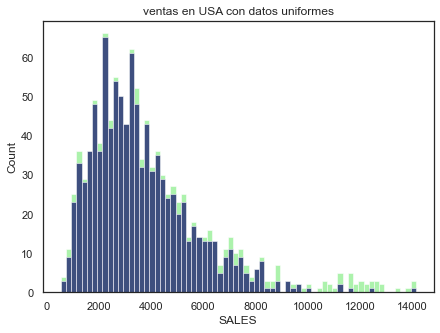

Text(0.5, 1.0, 'ventas en USA con datos normales')

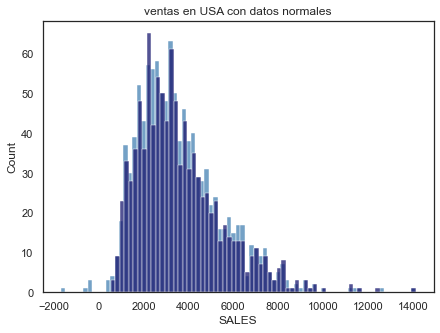

In [112]:
distribution_plotter(ventas_usa_unif, 'ventas en USA con datos uniformes', color='lightgreen')
distribution_plotter(ventas_usa, 'ventas en USA', color='midnightblue')
plt.title('ventas en USA con datos uniformes')
plt.show()
distribution_plotter(ventas_usa_adapt, 'ventas en USA con datos normales')
distribution_plotter(ventas_usa, 'ventas en USA', color='midnightblue')
plt.title('ventas en USA con datos normales')


El agregado uniforme mantuvo mejor la distribución original, y agregar más datos no modificaría esto significativamente, pero creo que habría que analizar un poco mejor los outliers, ya que se ven un poco extraños. Esto podría mejorarse cambiando el máximo de los datos generados con distribución normal. 